In [2]:
import numpy as np
# 2.5.1 함수
def sincos(x):
  return np.sin(x) + np.cos(x)

sincos(1)

1.3817732906760363

In [3]:
sincos([1, 2])

array([1.38177329, 0.49315059])

In [4]:
# 2.5.2 모듈: 기능에 따라 파일을 별도로 만들어 전체적인 코드를 완성

In [67]:
# 2.6 클래스

import numpy as np

class DataPreprocessing:
  def __init__(self, data, target):
    self.data = data
    self.target = target
    self.num_instances = self.data.shape[0]
    self.num_features = self.data.shape[1]
  def minmax(self):
    for i in range(self.num_features):
      col = self.data[:,i]
      self.data[:,i] = (self.data[:,i]-np.min(col))/(np.max(col)-np.min(col))
    return self
  def normalization(self):
    for i in range(self.num_features):
      col = self.data[:,i]
      mu, sigma = np.mean(col), np.std(col)
      self.data[:,i] = (self.data[:,i]-mu)/sigma
    return self
  def scaler(self,scaling=None):
    if scaling == 'minmax':
      self.minmax()
    elif scaling == 'standard':
      self.normalization()
    else:
      pass
    return self.data

In [70]:
data = np.random.normal(0, 10, (5, 5))
target = np.random.normal(0, 1, 5)
print(data)
data_processor = DataPreprocessing(data, target)
data = data_processor.scaler('minmax')
print(data)

[[ 20.11218947 -17.24863129   7.66078795 -14.86660204  -5.5947966 ]
 [ -9.0753965    4.48626828  21.93969012   1.61158475  -6.15393644]
 [ -5.81860943  -9.12382841  -6.32212106  -4.18982722  -4.32231026]
 [-15.68382387  17.35968539  -5.16274719  15.23148004 -12.51119198]
 [  9.95514681  -4.2892       7.3740285   -1.38859161  16.00977251]]
[[1.         0.         0.49476337 0.         0.24250216]
 [0.1846135  0.62802533 1.         0.54748295 0.22289764]
 [0.27559534 0.23476446 0.         0.35473273 0.28711798]
 [0.         1.         0.04102263 1.         0.        ]
 [0.71625213 0.37446003 0.48461684 0.44780297 1.        ]]


In [71]:
# 클래스 상속

class DataPipeline(DataPreprocessing):
  def __init__(self, data):
    self.data = data
    self.num_features = self.data.shape[1]

pipe = DataPipeline(data)
data = pipe.scaler('minmax')

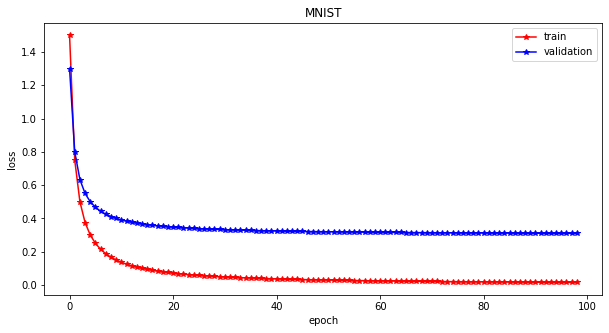

In [73]:
# 2.7 그래프 그리기

import matplotlib.pyplot as plt

epoch = np.arange(1, 100)
train_loss = 1.5/(epoch)
val_loss = .3+1/(epoch)

plt.figure(figsize=(10,5))
plt.plot(train_loss, 'r-*')
plt.plot(val_loss, 'b-*')
plt.legend(['train', 'validation'])
plt.title("MNIST")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

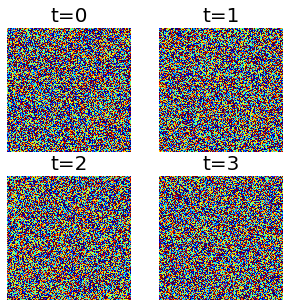

In [74]:
# 다중 그래프

random_images = np.random.normal(0, 1, (4, 216, 216))
ectend = [-1, 1, -1, 1]
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(random_images[0], interpolation='nearest', cmap='jet')
plt.title("t=0", fontsize=20)
plt.clim(-1,1)
plt.axis('off')
plt.subplot(222)
plt.imshow(random_images[1], interpolation='nearest', cmap='jet')
plt.title("t=1", fontsize=20)
plt.clim(-1,1)
plt.axis('off')
plt.subplot(223)
plt.imshow(random_images[2], interpolation='nearest', cmap='jet')
plt.title("t=2", fontsize=20)
plt.clim(-1,1)
plt.axis('off')
plt.subplot(224)
plt.imshow(random_images[3], interpolation='nearest', cmap='jet')
plt.title("t=3", fontsize=20)
plt.clim(-1,1)
plt.axis('off')
plt.show()